In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.utils import shuffle

Will be shuffling the final aggregated dataset before using in the model as the data values are sequential. Shuffled dataset will be divided into training and testing. 

In [2]:
broken_dataset  = "Data/broken30hz_stdev_100.csv"
healthy_dataset = "Data/healthy30hz_stdev_100.csv"

In [4]:
#Reading the healthy and broken datasets
healthyDataset = pd.read_csv(healthy_dataset)
brokenDataset = pd.read_csv(broken_dataset)

#Combining the healthy and broken datasets
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)

#Dataset basic details
dataset.describe()

,a1,a2,a3,a4,load,failure
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000
mean,5.766842,4.266330,3.847555,4.276706,45.644706,0.497401
std,2.219236,1.162870,1.020591,1.228792,28.660383,0.500006
min,1.468928,1.272738,0.990336,1.111679,0.000000,0.000000
25%,4.164285,3.473209,3.118392,3.409206,20.000000,0.000000
50%,5.337988,4.146414,3.779156,4.211713,50.000000,0.000000
75%,7.003621,4.903647,4.521386,5.078614,70.000000,1.000000
max,23.909199,10.984053,8.273939,10.609798,90.000000,1.000000


In [5]:
#dividing load with 100 for scaling the data
dataset["load"]= dataset["load"]/100

In [6]:
#viewing the dataset
dataset

,a1,a2,a3,a4,load,failure
0,4.518469,2.627219,3.129601,3.046165,0.0,0
1,3.463637,2.616907,2.286667,2.389276,0.0,0
2,4.461867,2.833214,2.413283,2.977934,0.0,0
3,4.381037,4.703040,2.668196,2.650610,0.0,0
4,3.880276,3.054690,2.502711,2.147417,0.0,0
...,...,...,...,...,...,...
10044,4.020584,4.213608,3.332272,4.147442,0.9,1
10045,4.842131,6.242672,4.369814,5.759370,0.9,1
10046,4.387001,4.183584,4.093012,5.853607,0.9,1
10047,3.549780,3.318551,3.709936,5.245193,0.9,1


In [18]:
#printing null values in each column
counts = dataset.isna().sum()
print(counts.sort_values())

a1         0
a2         0
a3         0
a4         0
load       0
failure    0
dtype: int64


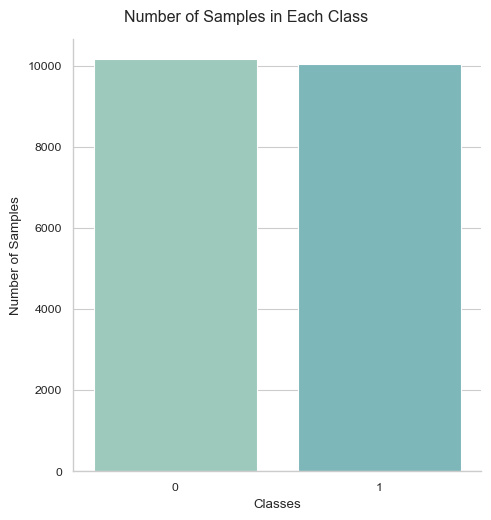

In [20]:
# Plotting the number of sample of of data for healthy and failure classes
# plt.figure(figsize=(15,4))
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='failure', data=dataset, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Classes')
plt.show()

# Failure Column values

### 0 --> Healhty
### 1 --> Broken

In [8]:
#Range of values for each sensor type:

print("a1 max value: ",dataset.a1.max())
print("a1 min value: ",dataset.a1.min())
print("a2 max value: ",dataset.a2.max())
print("a2 min value: ",dataset.a2.min())
print("a3 max value: ",dataset.a3.max())
print("a3 min value: ",dataset.a3.min())
print("a4 max value: ",dataset.a4.max())
print("a4 min value: ",dataset.a4.min())


a1 max value:  23.909198829607966
a1 min value:  1.4689275707806346
a2 max value:  10.984053443065797
a2 min value:  1.2727376138671107
a3 max value:  8.273938829112943
a3 min value:  0.9903356318147843
a4 max value:  10.609798141066044
a4 min value:  1.1116785206448432


## Modelling ANN

In [9]:
#Lisiting the features column and the target label column
training_features = ['a1', 'a2', 'a3', 'a4', 'load']
label = ['failure']

In [10]:
#Creating a dataset with the input training features only
x = dataset[training_features]
x.shape #training features of consists of 2021119 rows and 5 columns

(20203, 5)

In [11]:
#Creating a dataset with the oytput target label column only only
y = dataset[label]
y.shape #label data consists of 2021119 rows and 1 col 

(20203, 1)

In [12]:
#shuffling the dataset
x1,y1 = shuffle(x,y)


In [13]:
#Splitting the dataset into training and testing sets. #0% of the data is used for testing. Remaining for training
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [14]:
x1_train.shape,x1_test.shape, y1_train.shape, y1_test.shape 

((14142, 5), (6061, 5), (14142, 1), (6061, 1))

In [15]:
#importing required packages for modelling
from keras import Sequential
from keras.layers import BatchNormalization, Dense, Activation

In [16]:
#Building the neural network model
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [17]:
#Training the model with the training data
history = model.fit(x1_train, y1_train, batch_size=32, epochs=100,validation_data=(x1_test, y1_test))

Epoch 1/100
442/442 [==============================] - 2s 2ms/step - loss: 0.6448 - binary_accuracy: 0.6391 - val_loss: 0.4961 - val_binary_accuracy: 0.7976
Epoch 2/100
442/442 [==============================] - 1s 2ms/step - loss: 0.4226 - binary_accuracy: 0.8372 - val_loss: 0.3677 - val_binary_accuracy: 0.8640
Epoch 3/100
442/442 [==============================] - 1s 2ms/step - loss: 0.3395 - binary_accuracy: 0.8735 - val_loss: 0.3159 - val_binary_accuracy: 0.8824
Epoch 4/100
442/442 [==============================] - 1s 2ms/step - loss: 0.3035 - binary_accuracy: 0.8846 - val_loss: 0.2889 - val_binary_accuracy: 0.8928
Epoch 5/100
442/442 [==============================] - 1s 2ms/step - loss: 0.2876 - binary_accuracy: 0.8888 - val_loss: 0.2719 - val_binary_accuracy: 0.8989
Epoch 6/100
442/442 [==============================] - 1s 2ms/step - loss: 0.2716 - binary_accuracy: 0.8935 - val_loss: 0.2605 - val_binary_accuracy: 0.9018
Epoch 7/100
442/442 [==============================] - 1s 

In [21]:
# model has a validation accuraccy of 90.58%

#Saving our model to local directory
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
